In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
def cauchy_gen(N,alpha,beta): 
    from scipy.stats import cauchy
    loc = alpha
    scale = beta 
    x = cauchy.rvs(loc = alpha, scale = beta, size=N)  #Array of Cauchy distributed numbers  
    return x 

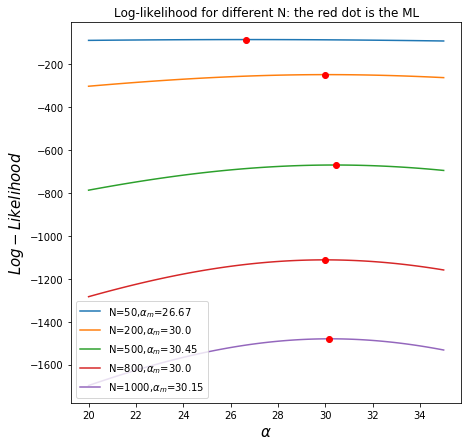

In [5]:
plt.figure(figsize=(7,7))
for i in 50,200,500,800,1000:  #different values of N 
    alpha = 30.0 
    beta = 10.0 #known 
    x = cauchy_gen(i,alpha,beta);   #generation of samples from Cauchy's distribution 
    a = np.linspace(20,35,100);     #generation of parameter points in order to plot the Log-L 
    
    somma = 0
    for k in range(i):                      #log-Likelihood function 
        somma+= np.log(1+((x[k]-a)/beta)**2)
    
    logL = -somma 
    alpha_est= round(a[np.argmax(logL)],2) #Maximum Likelihood estimation 
    plt.plot(a,logL,label='N='+str(i)+','+'$\\alpha_m $='+str(alpha_est),)
    plt.legend()
    plt.plot([alpha_est],[max(logL)],'ro')
    plt.title('Log-likelihood for different N: the red dot is the ML')
    plt.ylabel('$Log-Likelihood $',fontsize=15)
    plt.xlabel('$ \\alpha $',fontsize= 15)
plt.savefig('log-L.pdf')

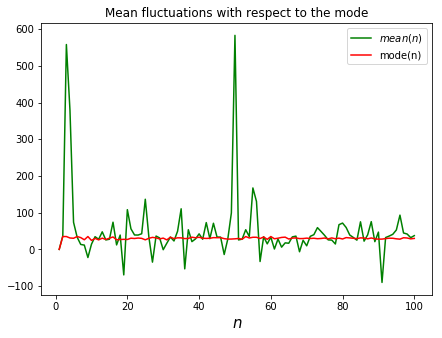

In [6]:
Nmax = 100
n = np.linspace(1,Nmax,Nmax)
alpha = 30.0
beta = 10.0
somma = np.zeros(Nmax)
plt.figure(figsize=(7,5))
alpha_est = np.zeros(Nmax)
a = np.linspace(20,35,100)
for N in range(1,Nmax):
    x = cauchy_gen(N,alpha,beta) 
    som = 0 
    for k in range(N):                     #Log-likelihood function 
        som+= np.log(1+((x[k]-a)/beta)**2)
    
    logL = -som 
    alpha_est[N]= round(a[np.argmax(logL)],2) #Maximum Likelihood estimation 
    
    for j in x:            #Sum computation 
        somma[N]+= j
    somma[N]= somma[N]/N
    
    
plt.title('Mean fluctuations with respect to the mode')
plt.xlabel('$n$',fontsize = 15)
plt.plot(n,somma,'green',label = '$mean(n)$')
mode = plt.plot(n,alpha_est,'r',label='mode(n)')
plt.legend()
plt.savefig('sum_mode_fluct.pdf')